<!DOCTYPE html>
<html>
<head>
    <style>
        .center {
            display: flex;
            justify-content: center;
            align-items: center;
            text-align: center;
        }
    </style>
</head>
<body>
    <center>
        <div class="center"><h1>EN3160 Image Processing and Computer Vision</h1></div>
        <div class="center"><h1>Assignment 1</h1></div>
        <div class="center"><h1>Ahamed M.B.S.A. - 200014B</h1></div>
        <div class="center"><h1>1st September 2023</h1></div>
    </center>
</body>
</html>


### GitHub Repository: https://github.com/ahamedmbsa/EN3160-Image-Processing-and-Machine-Vision

#### Question 01

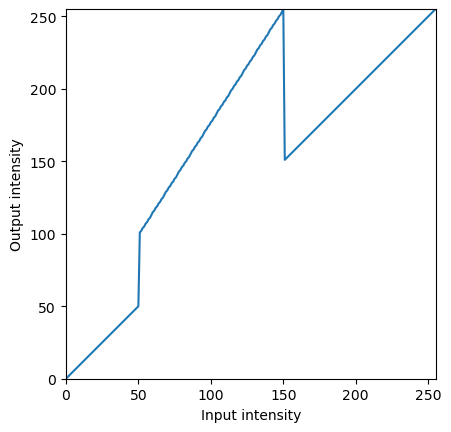

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, 255, 255 - c[3, 0]).astype('uint8')

transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.show()

img_orig = cv.imread('Images/emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

#### Question 02

To accentuate required parts of the image, the relevant intensity ranges are mapped to a larger and brighter intensity range compared to the rest of the image.

256
256


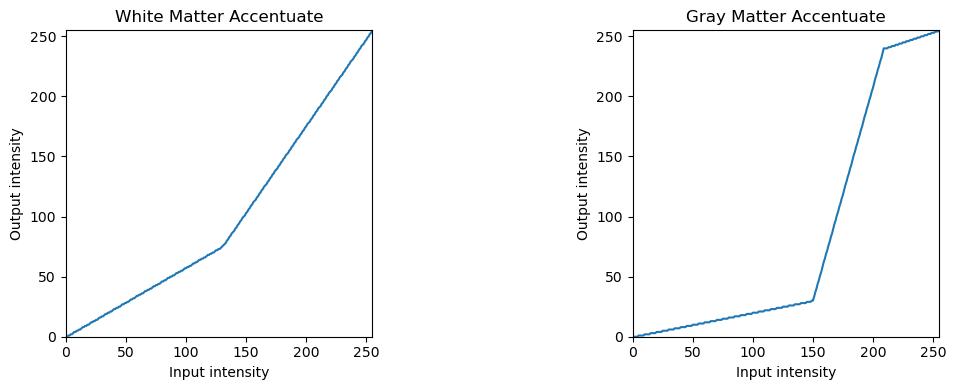

In [2]:
c = np.array([(130, 75)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')

t2 = np.linspace(c[0, 1] + 1, 255, 255 - c[0, 0]).astype('uint8')

t3 = np.linspace(0,30,150)

t4 = np.linspace(30,240,60)

t5 = np.linspace(240,255,46)

white_matter_transform = np.concatenate((t1, t2), axis=0).astype('uint8')
print(len(white_matter_transform))

gray_matter_transform = np.concatenate((t3, t4, t5), axis=0).astype('uint8')
print(len(gray_matter_transform))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(white_matter_transform)
ax1.set_xlabel('Input intensity')
ax1.set_ylabel('Output intensity')
ax1.set_xlim(0, 255)
ax1.set_ylim(0, 255)
ax1.set_aspect('equal')
ax1.set_title('White Matter Accentuate')

ax2.plot(gray_matter_transform)
ax2.set_xlabel('Input intensity')
ax2.set_ylabel('Output intensity')
ax2.set_xlim(0, 255)
ax2.set_ylim(0, 255)
ax2.set_aspect('equal')
ax2.set_title('Gray Matter Accentuate')

plt.tight_layout()  # Ensure proper spacing
plt.show()

img_orig = cv.imread('Images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, white_matter_transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()       

img_orig = cv.imread('Images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, gray_matter_transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

#### Question 03

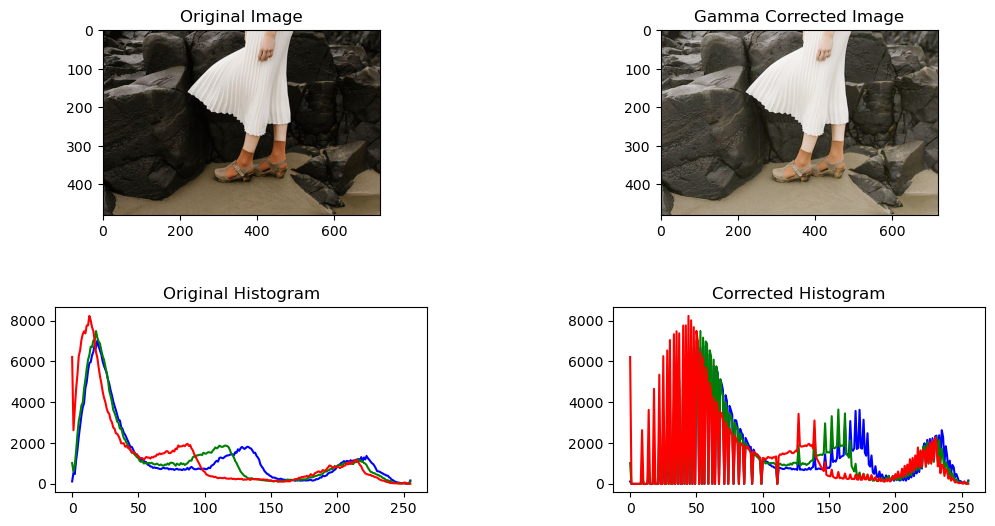

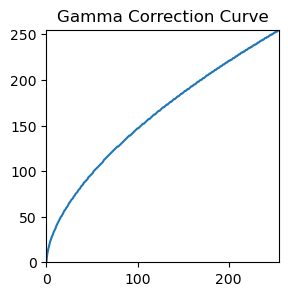

In [3]:
img_orig = cv.imread('Images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)

gamma = 1.7

table = np.array([(i/255.0)**(1/gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)

img_orig_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma_rgb = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

fig, axarr = plt.subplots(2, 2, figsize=(12, 6))
fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing

axarr[0, 0].imshow(img_orig_rgb)
axarr[0, 0].set_title('Original Image')
axarr[0, 1].imshow(img_gamma_rgb)
axarr[0, 1].set_title('Gamma Corrected Image')

colors = ('b', 'g', 'r')

for i, color in enumerate(colors):
    hist_orig = cv.calcHist([img_orig_rgb], [i], None, [256], [0, 256])
    hist_gamma = cv.calcHist([img_gamma_rgb], [i], None, [256], [0, 256])
    
    axarr[1, 0].plot(hist_orig, color=color)
    axarr[1, 0].set_title('Original Histogram')
    axarr[1, 1].plot(hist_gamma, color=color)
    axarr[1, 1].set_title('Corrected Histogram')
    
f, ax = plt.subplots(figsize=(3, 6))
ax.plot(table)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.set_title('Gamma Correction Curve')

plt.show()

γ was adjusted until the textures of the rock were clearly visible.

#### Question 04

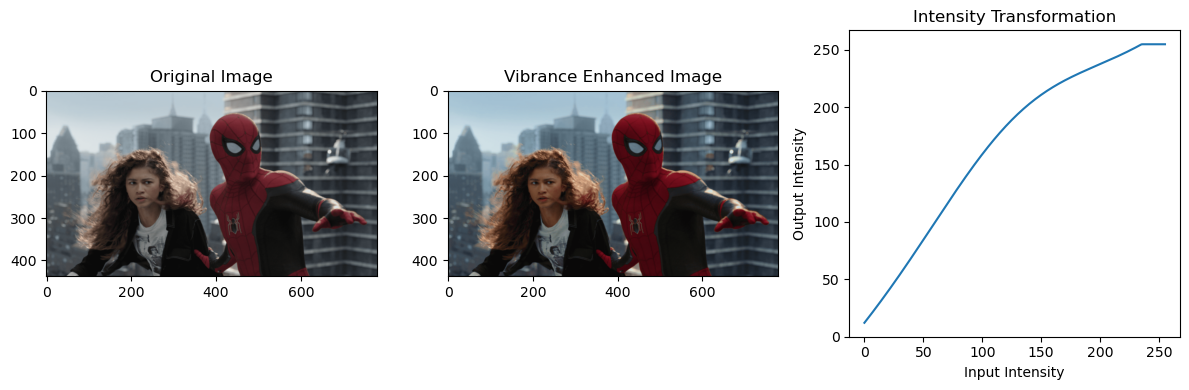

In [4]:
image = cv.imread('Images/spider.png', cv.IMREAD_COLOR)

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

saturation = hsv_image[:, :, 1]

a = 0.5 
sigma = 70

def intensity_transformation(x):
    return min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * (sigma ** 2))), 255)

transformed_saturation = np.vectorize(intensity_transformation)(saturation)

hsv_image[:, :, 1] = transformed_saturation

vibrance_enhanced_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(vibrance_enhanced_image, cv.COLOR_BGR2RGB))
plt.title('Vibrance Enhanced Image')

x = np.arange(256)
y = [intensity_transformation(i) for i in x]

plt.subplot(133)
plt.plot(x, y)
plt.title('Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')

plt.tight_layout()
plt.show()

# cv.imwrite('vibrance_enhanced_image.jpg', vibrance_enhanced_image)

When a gets closer to 1, the image becomes excessively vibrant. a = 0.3 gave a suitable vibrance level for the image to remain natural.

#### Question 05

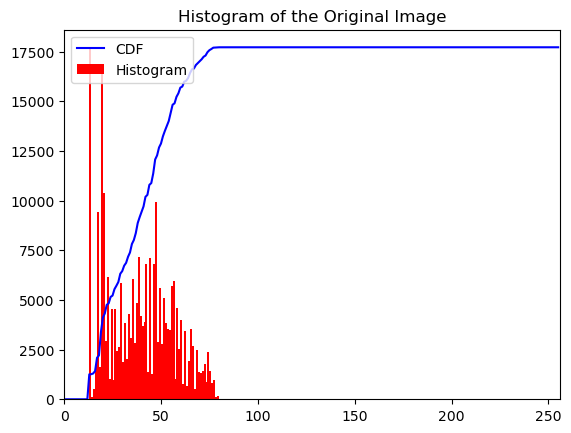

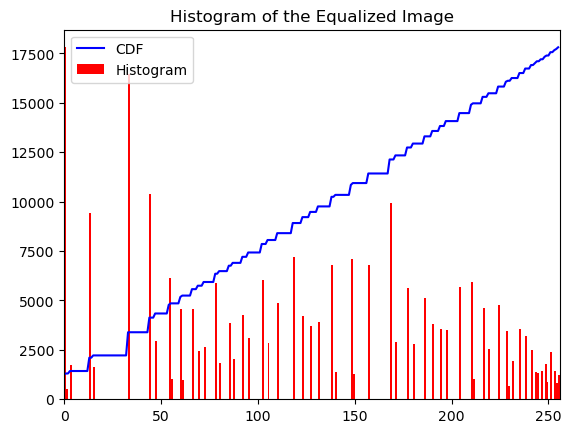

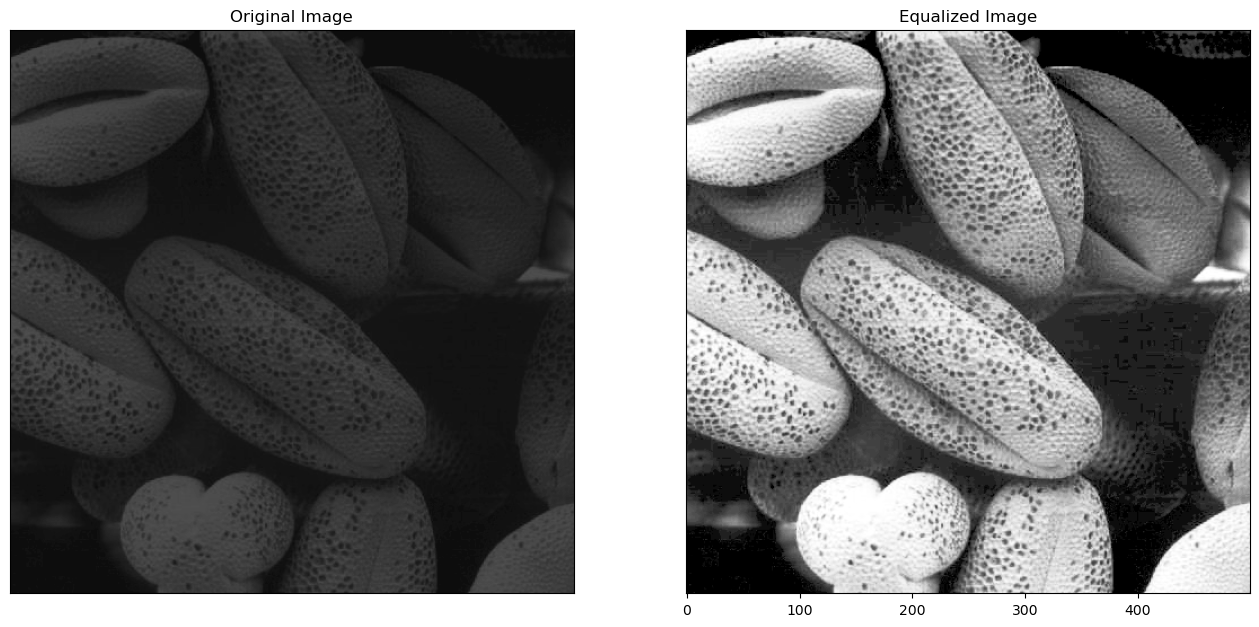

In [5]:
img = cv.imread('Images/shells.tif', cv.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Histogram of the Original Image')
plt.show()

equ = cv.equalizeHist(img)

hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(equ.ravel(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

fig, ax =plt.subplots(1,2,figsize=(16,16),sharey='row') 
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("Original Image")
ax[0].set_xticks([])

ax[1].imshow(equ ,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("Equalized Image")
ax[1].set_yticks([])
plt.show()


#### Question 06

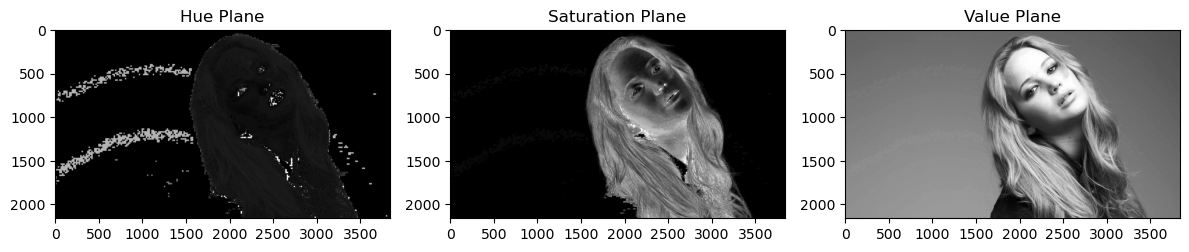

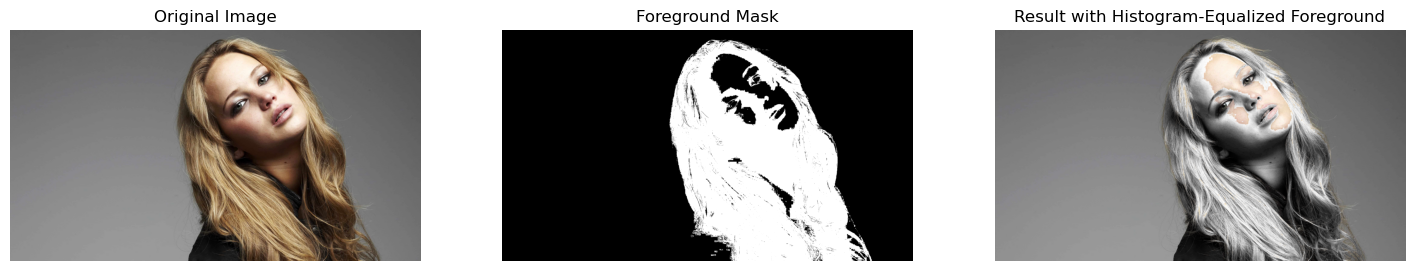

In [6]:
image = cv.imread('Images/jeniffer.jpg')

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

hue_plane, sat_plane, value_plane = cv.split(hsv_image)

# Display the Hue, Saturation, and Value planes in grayscale
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(hue_plane, cmap='gray')
plt.title('Hue Plane')

plt.subplot(132)
plt.imshow(sat_plane, cmap='gray')
plt.title('Saturation Plane')

plt.subplot(133)
plt.imshow(value_plane, cmap='gray')
plt.title('Value Plane')

plt.tight_layout()
plt.show()

_, thresholded_mask = cv.threshold(sat_plane, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

foreground = cv.bitwise_and(image, image, mask=thresholded_mask)

hist, bins = np.histogram(foreground.ravel(), 256, [0, 256])

cumulative_hist = np.cumsum(hist)

equalized_foreground = cv.equalizeHist(cv.cvtColor(foreground, cv.COLOR_BGR2GRAY))

background_mask = cv.bitwise_not(thresholded_mask)

background = cv.bitwise_and(image, image, mask=background_mask)

result_image = cv.add(background, cv.cvtColor(equalized_foreground, cv.COLOR_GRAY2BGR))

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(thresholded_mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.title('Result with Histogram-Equalized Foreground')
plt.axis('off')

plt.show()

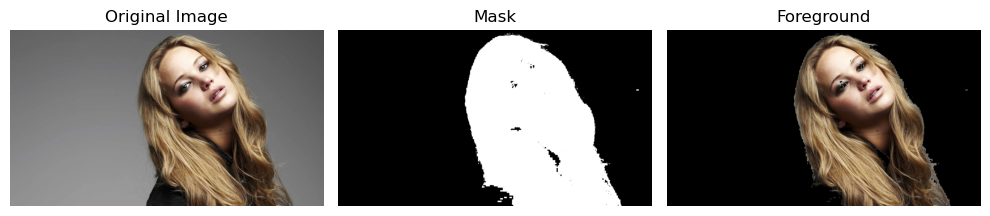

In [7]:
# Saturation plane can be used to extract the foreground
threshold = 12  # This was adjusted until the separation was satisfactory
mask = (sat_plane > threshold).astype(np.uint8) * 255 
mask_3d = np.repeat(mask[:, :, None], 3, axis=2)

foreground_hsv = np.bitwise_and(hsv_image, mask_3d)  # obtaining the foreground
foreground_rgb = cv.cvtColor(foreground_hsv, cv.COLOR_HSV2RGB)

plt.figure(figsize = (10, 10))
plt.subplot(131)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(mask_3d)
plt.title('Mask')
plt.axis('off')
plt.subplot(133)
plt.imshow(foreground_rgb)
plt.title('Foreground')
plt.axis('off')
plt.tight_layout()

In the saturation plane, the background is clearly darker than the foreground. Therefore, this plane was selected for extracting the foreground using a threshold.

Text(0.5, 1.0, 'Cumulative sum of histogram of foreground')

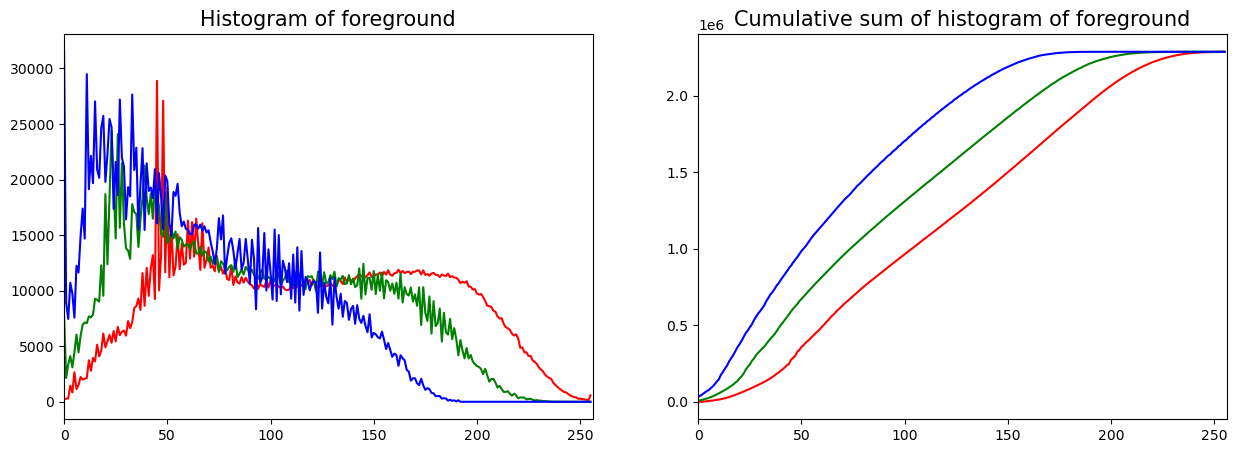

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.rc("axes", titlesize = 15)

equalized_foreground = foreground_rgb.copy()
colors = ('r', 'g', 'b')
total = mask.sum() // 255

# Loop over color channels and calculate and plot histograms
for i, color in enumerate(colors):
    # Consider only foreground by giving mask as an argument
    hist = cv.calcHist([foreground_rgb], [i], thresholded_mask, [256], [0, 256])
    ax[0].plot(hist, color=color)
    ax[0].set_xlim([0, 256])

    cumulative = np.cumsum(hist)
    ax[1].plot(cumulative, color=color)
    ax[1].set_xlim([0, 256])

    transform = cumulative * 255 / cumulative[-1]
    equalized_foreground[:, :, i] = transform[foreground_rgb[:, :, i]]

# Remove background again after equalization
equalized_foreground = np.bitwise_and(equalized_foreground, mask_3d)

ax[0].set_title("Histogram of foreground")
ax[1].set_title("Cumulative sum of histogram of foreground")

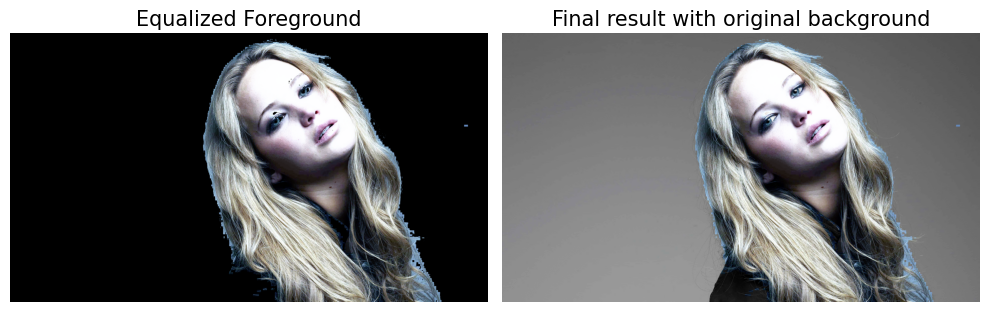

In [9]:
background_mask_3d = 255 - mask_3d
background_hsv = np.bitwise_and(hsv_image, background_mask_3d)   # Extract background
background_rgb = cv.cvtColor(background_hsv, cv.COLOR_HSV2RGB)
final_image = background_rgb + equalized_foreground     # Add with foreground

plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(equalized_foreground)
plt.title('Equalized Foreground')
plt.axis('off')
plt.subplot(122)
plt.imshow(final_image)
plt.title('Final result with original background')
plt.axis('off')
plt.tight_layout()

#### Question 07

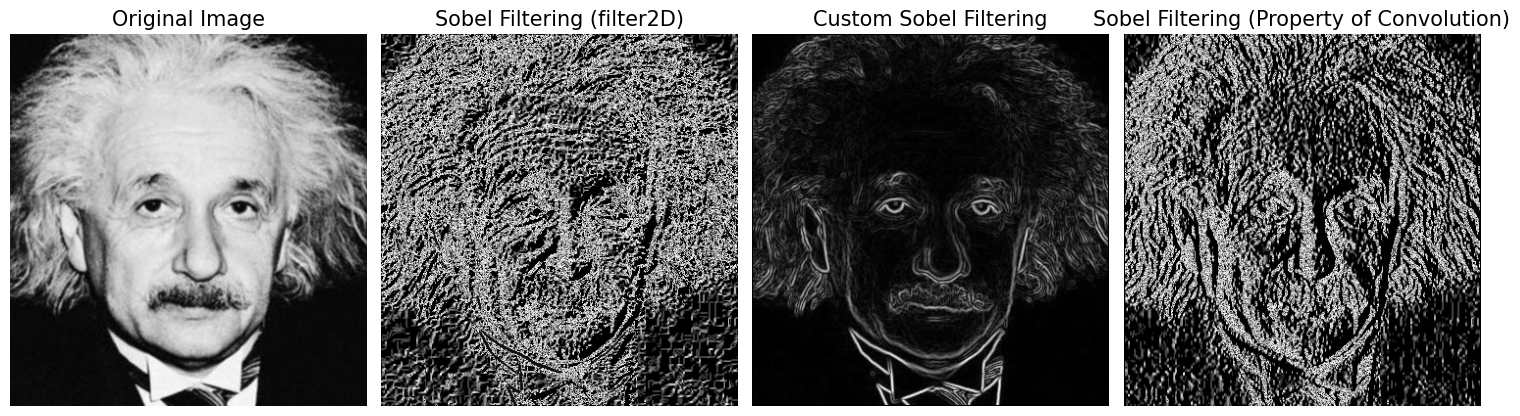

In [10]:
# Load the image (replace 'image.jpg' with your image filename)
image = cv.imread('Images/einstein.png', cv.IMREAD_GRAYSCALE)

# Define Sobel kernels
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

# (a) Using cv2.filter2D for Sobel filtering
sobel_x = cv.filter2D(image, -1, sobel_kernel_x)
sobel_y = cv.filter2D(image, -1, sobel_kernel_y)
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# (b) Implementing your own Sobel filtering code
def custom_sobel_filter(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    pad_height = k_height // 2
    pad_width = k_width // 2

    output = np.zeros((height, width), dtype=np.float32)

    for i in range(pad_height, height - pad_height):
        for j in range(pad_width, width - pad_width):
            roi = image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            gradient_x = np.sum(roi * kernel)
            gradient_y = np.sum(roi * np.flip(kernel, axis=0).T)  # Transpose and flip kernel for Y direction
            output[i, j] = np.sqrt(gradient_x**2 + gradient_y**2)

    return output

sobel_magnitude_custom = custom_sobel_filter(image, sobel_kernel_x)

# (c) Using the given property for Sobel filtering
sobel_x_property = cv.filter2D(image, -1, np.array([[-1, 0, 1]], dtype=np.float32))
sobel_y_property = cv.filter2D(sobel_x_property, -1, np.array([[1], [2], [1]], dtype=np.float32))
sobel_magnitude_property = np.sqrt(sobel_x_property**2 + sobel_y_property**2)

# Display the results
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(sobel_magnitude, cmap='gray')
axes[1].set_title("Sobel Filtering (filter2D)")
axes[2].imshow(sobel_magnitude_custom, cmap='gray')
axes[2].set_title("Custom Sobel Filtering")
axes[3].imshow(sobel_magnitude_property, cmap='gray')
axes[3].set_title("Sobel Filtering (Property of Convolution)")


for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


#### Question 08

In [11]:
def zoom_nearest_neighbor(image, scale_factor):
    height, width = image.shape[:2]
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    return cv.resize(image, (new_width, new_height), interpolation=cv.INTER_NEAREST)

def zoom_bilinear(image, scale_factor):
    height, width = image.shape[:2]
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    return cv.resize(image, (new_width, new_height), interpolation=cv.INTER_LINEAR)

def compute_normalized_ssd(image1, image2):
    squared_diff = (image1.astype(np.float32) - image2.astype(np.float32)) ** 2
    mse = np.mean(squared_diff)
    normalized_ssd = mse / (np.max(image1) - np.min(image1))
    return normalized_ssd

# Load the original small and large images
original_small = cv.imread('Images/im01small.png', cv.IMREAD_GRAYSCALE)
original_large = cv.imread('Images/im01.png', cv.IMREAD_GRAYSCALE)

# Zoom up the small image using both methods
zoomed_nn_small = zoom_nearest_neighbor(original_small, 4)
zoomed_bilinear_small = zoom_bilinear(original_small, 4)

# Calculate normalized SSD between the large image and zoomed small images
ssd_nn_small = compute_normalized_ssd(original_large, zoomed_nn_small)
ssd_bilinear_small = compute_normalized_ssd(original_large, zoomed_bilinear_small)

# Print the results
print(f"Normalized SSD between for zoomed small image (Nearest Neighbor): {ssd_nn_small}")
print(f"Normalized SSD between for zoomed small image (Bilinear Interpolation): {ssd_bilinear_small}")


Normalized SSD between for zoomed small image (Nearest Neighbor): 0.5401952862739563
Normalized SSD between for zoomed small image (Bilinear Interpolation): 0.45534470677375793


img.shape:  (270, 480, 3)
original_image.shape:  (1080, 1920, 3)
Zoomed image size (nni):  (1080, 1920, 3)
Zoomed image size (bli):  (1080, 1920, 3)


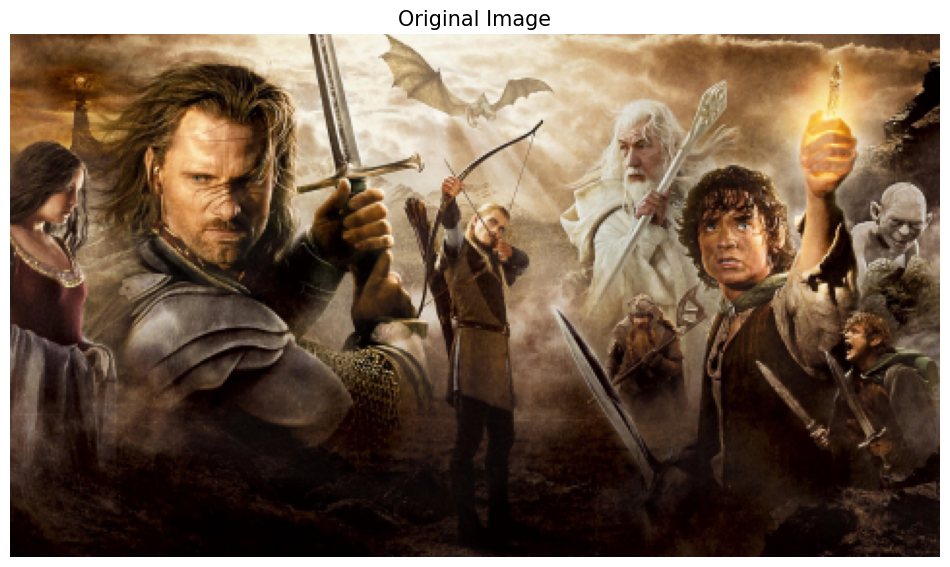

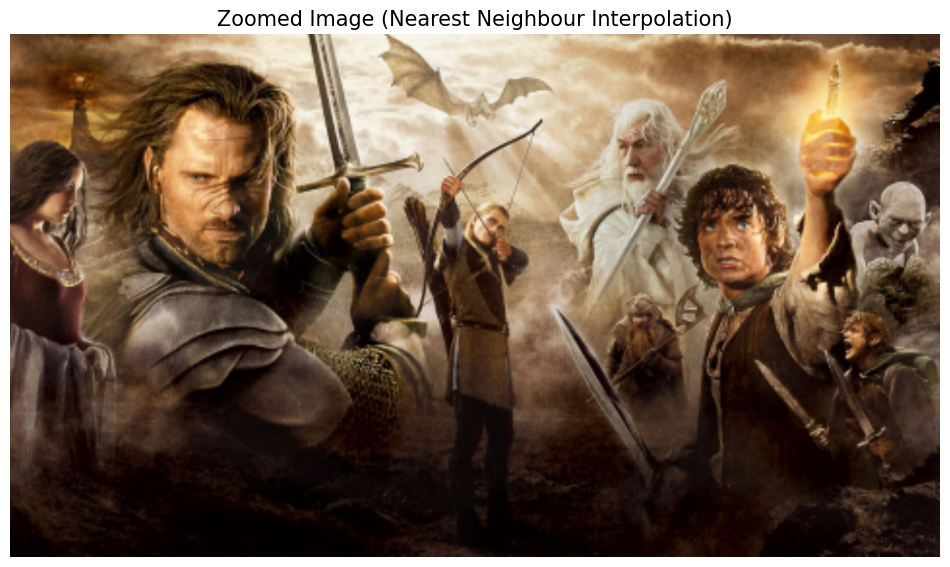

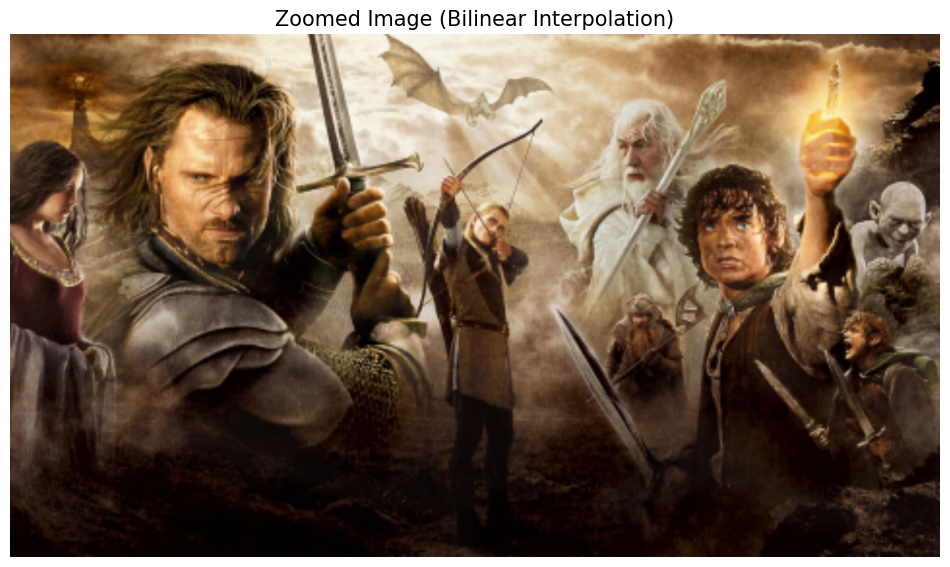

SSD (Nearest Neighbour Interpolation):  117.721953125
SSD (Bilinear Interpolation):  117.721953125


In [12]:
def zoom_nearest_neighbour(img,new_img,new_img_height,new_img_width,zoom_factor):
    for i in range(new_img_height):
        for j in range(new_img_width):
            new_img[i,j] = img[int(i/zoom_factor),int(j/zoom_factor)]
    return new_img

def zoom_bilinear_interpolation(img,new_img,new_img_height,new_img_width,zoom_factor):
    for i in range(new_img_height):
        for j in range(new_img_width):
            x = int(i/zoom_factor)
            y = int(j/zoom_factor)
            a = i/zoom_factor - x
            b = j/zoom_factor - y
            if x == img.shape[0]-1 or y == img.shape[1]-1:
                new_img[i,j] = img[x,y]
            else:
                new_img[i,j] = (1-a)*(1-b)*img[x,y] + (1-a)*b*img[x,y+1] + a*(1-b)*img[x+1,y] + a*b*img[x+1,y+1]
    return new_img

# import image
img = cv.imread("Images/im01small.png", cv.IMREAD_COLOR)
print("img.shape: ", img.shape)
original_image = cv.imread("Images/im01.png", cv.IMREAD_COLOR)
print("original_image.shape: ", original_image.shape)

# Define the zoom factor
zoom_factor = 4

# Define the new image size
new_img_size = (img.shape[0] * zoom_factor, img.shape[1] * zoom_factor, img.shape[2])
new_img_height = new_img_size[0]
new_img_width = new_img_size[1]

# Create a new image with the new size
new_img = np.zeros(new_img_size, dtype=np.uint8)

# Zoom the image using nearest neighbour interpolation
new_image_nni = zoom_nearest_neighbour(img,new_img,new_img_height,new_img_width,zoom_factor)

# Zoom the image using bilinear interpolation
new_image_bli = zoom_bilinear_interpolation(img,new_img,new_img_height,new_img_width,zoom_factor)

# Print details of the original and zoomed images
print("Zoomed image size (nni): ", new_image_nni.shape)
print("Zoomed image size (bli): ", new_image_bli.shape)

# Display the original and zoomed images
plt.figure(figsize=(12, 12))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

plt.figure(figsize=(12, 12))
plt.imshow(cv.cvtColor(new_image_nni, cv.COLOR_BGR2RGB))
plt.title("Zoomed Image (Nearest Neighbour Interpolation)")
plt.axis("off")
plt.show()

plt.figure(figsize=(12, 12))
plt.imshow(cv.cvtColor(new_image_bli, cv.COLOR_BGR2RGB))
plt.title("Zoomed Image (Bilinear Interpolation)")
plt.axis("off")
plt.show()

# compute the normalized sum of squared difference (SSD) between the original and zoomed images
ssd_nni = np.sum((original_image - new_image_nni)**2) / (original_image.shape[0] * original_image.shape[1])
ssd_bli = np.sum((original_image - new_image_bli)**2) / (original_image.shape[0] * original_image.shape[1])

print("SSD (Nearest Neighbour Interpolation): ", ssd_nni)
print("SSD (Bilinear Interpolation): ", ssd_bli)

#### Question 09

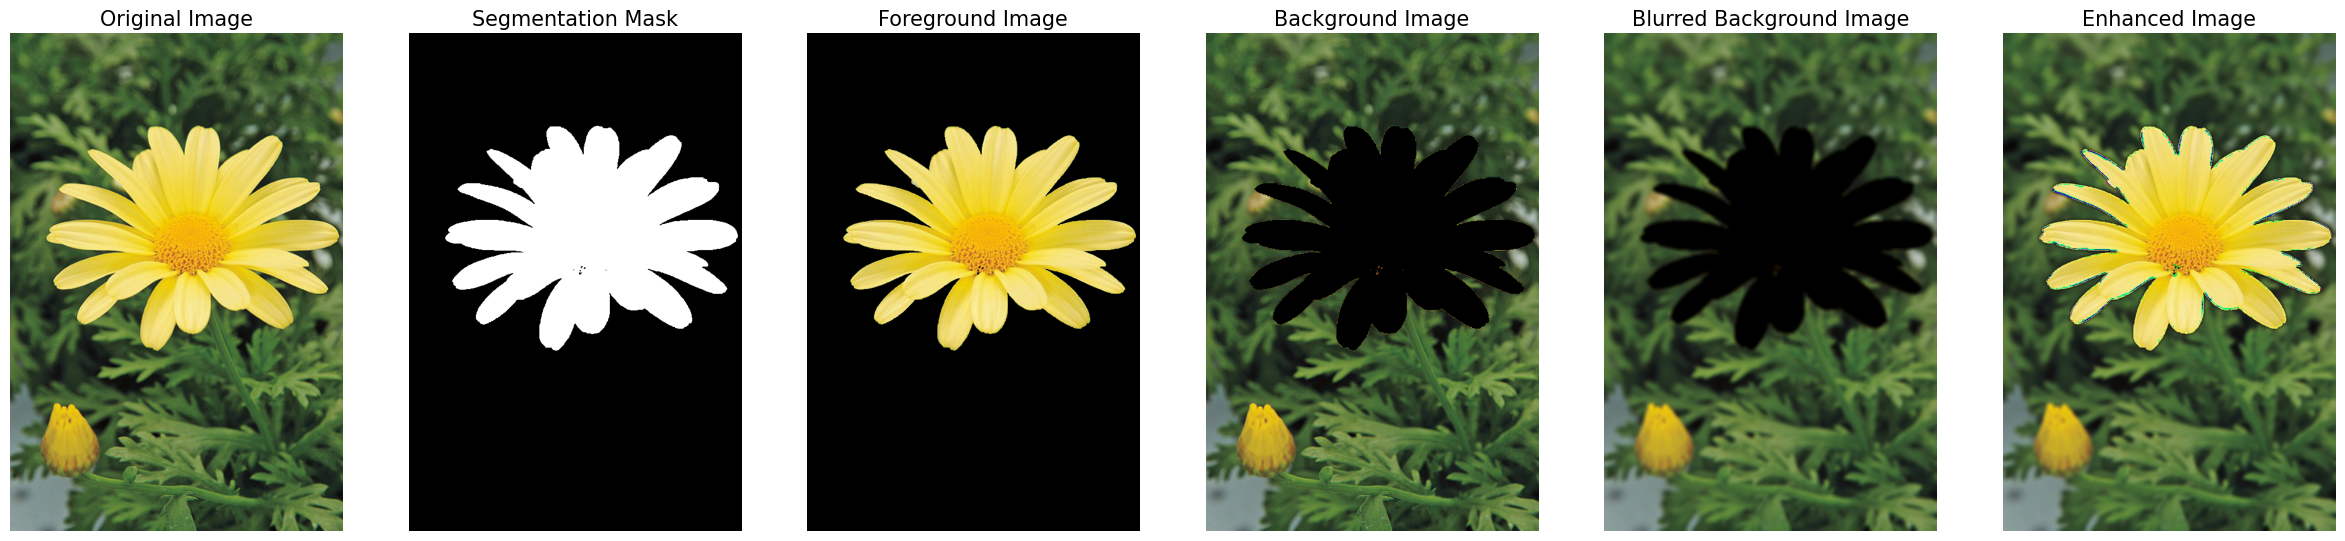

In [13]:
image = cv.imread('Images/flower.png')

mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (30,70,650,550)

cv.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
fore = image*mask2[:,:,np.newaxis]
back = image - fore

blurred_bg = cv.GaussianBlur(back, (9,9), 4)
enhanced = fore + blurred_bg
fig, ax =plt.subplots(1,6,figsize=(30,8)) 
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(mask2,cmap='gray')
ax[1].set_title("Segmentation Mask")

ax[2].imshow(cv.cvtColor(fore, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground Image")

ax[3].imshow(cv.cvtColor(back, cv.COLOR_BGR2RGB))
ax[3].set_title("Background Image")

ax[4].imshow(cv.cvtColor(blurred_bg, cv.COLOR_BGR2RGB))
ax[4].set_title("Blurred Background Image")

ax[5].imshow(cv.cvtColor(enhanced, cv.COLOR_BGR2RGB))
ax[5].set_title("Enhanced Image")
for i in range(6):
    ax[i].axis("off")
plt.show()

The dark edge in the enhanced image is because the masked black pixels in the background image get averaged with the background pixels at the border of the mask when Gaussian blur is applied.